In [1]:
import random

import os.path as op
import pandas as pd

from scripts.utils import get_path
from funcs.plots import Fig2CMethods

In [2]:
data_path = get_path("dataframes")
fig_dir = get_path("figures")

no_init = False

trials_data = pd.read_pickle(op.join(data_path, "individual_trials_data.pkl"))
random_audiograms = pd.read_pickle(op.join(data_path, f"global_random_audiograms_{'noInit' if no_init else 'withInit'}.pkl"))
pseudo_psychometric_curves = pd.read_pickle(op.join(data_path, f"sigmoid_data_{'noInit' if no_init else 'withInit'}.pkl"))

### Choose participant and condition

In [3]:
# Choose at random
participant = random.choice(trials_data.participant.unique())
# paradigm = random.choice(trials_data.paradigm.unique())
# pred = paradigm if paradigm in ['3AFC', 'Bayesian'] else random.choice(['both', 'frequency', 'time', 'none'])

In [4]:
# Select specific example
participant = 'tlvjds'  # 'nlhglm' 'klxufm' 'udoety' 'quicsb' 'moiern' tlvjds tsbvqq
paradigm = 'Cluster'
pred = 'both'

In [5]:
print(f"Plotting example data for: {participant} ({paradigm}{'' if paradigm in ['3AFC', 'Bayesian'] else f', {pred}'})")

Plotting example data for: tlvjds (Cluster, both)


In [6]:
# Filter data
random_audiogram = random_audiograms.loc[random_audiograms.participant == participant]

In [7]:
trials_data = trials_data.loc[(trials_data.participant == participant)
                                     & (trials_data.paradigm == paradigm)
                                     & (trials_data.pred == pred)]

trials_data.reset_index(inplace=True)

In [8]:
sigmoid = pseudo_psychometric_curves.loc[
    (pseudo_psychometric_curves.participant == participant) &
    (pseudo_psychometric_curves.paradigm == paradigm) &
    (pseudo_psychometric_curves.pred == pred)]

### Fig2C - Plot global random audiogram


In [9]:
# Create an instance of the Fig2 class with the chosen data
method_figures = Fig2CMethods(random_audiogram, sigmoid, trials_data, paradigm, pred)

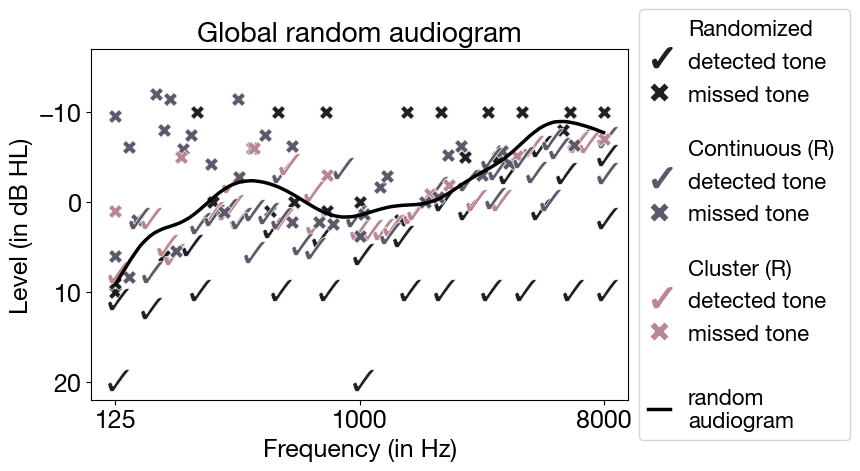

In [10]:
# Plot random trials and resulting global random audiogram
figure = method_figures.plot_example_global_random_audiogram()
figure.savefig(op.join(fig_dir, "Fig2C-global_random_audiogram.svg"))

### Fig2C - Plot tested tone's distances from GRT

24


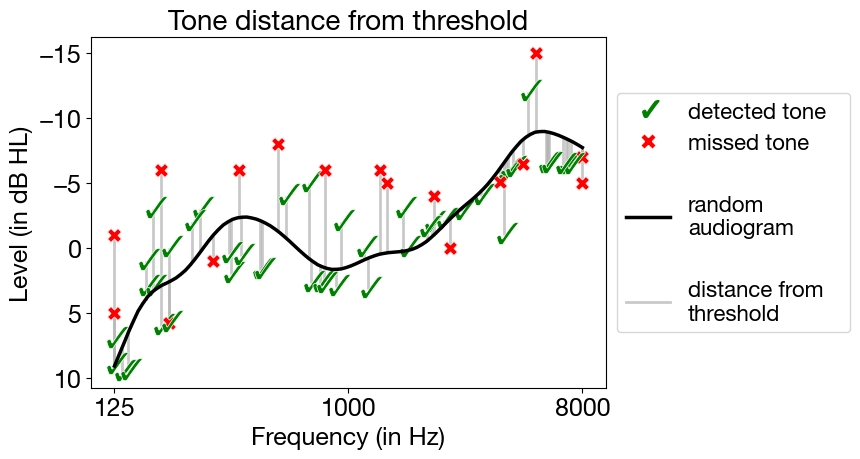

In [11]:
fig = method_figures.plot_example_distances(plot_init=True, ylims=[-20, 15])
fig.savefig(op.join(fig_dir, "Fig2C-distance_to_random_audiogram.svg"))

### Fig2C - Plot sigmoid and p50 value

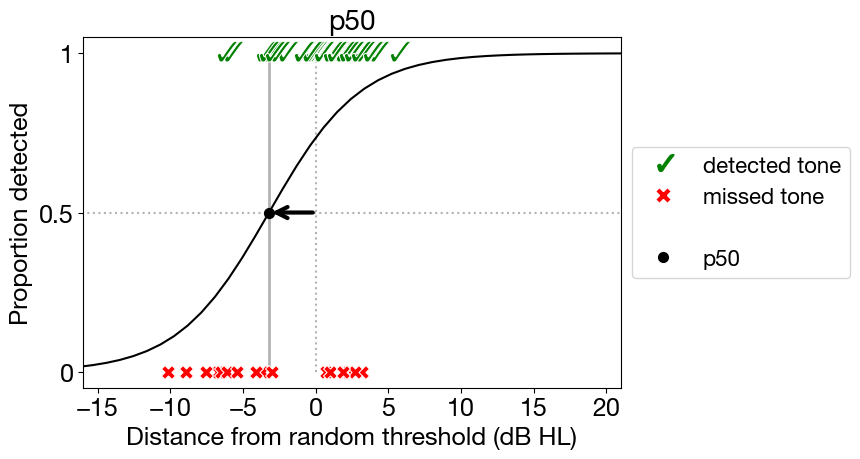

In [12]:
fig = method_figures.plot_example_sigmoid()
fig.savefig(op.join(fig_dir, "Fig2C-sigmoid_and_responses.svg"))